In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from tensorflow import keras as ks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# preparing data

In [4]:
'upload file from pc'
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['final data fill nan .csv']))

NameError: name 'files' is not defined

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['final data fill nan .csv']))
data=data.drop(['Unnamed: 0'],axis=1)

In [5]:
data_X=data.iloc[:,:276]
data_Y=data.iloc[:,-1]

In [7]:
#choose 2019 data as Y test than shuffle datas
a=data_X.iloc[:,0]==2019
ind_list=[i for i, data_X in enumerate(a) if data_X]

# 2019 Y data choose as test samples other as train 
Y_train=[i for i in data_Y[ind_list]]
Y_test=[i for i in data_Y[:ind_list[0]-1]]
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,train_size=len(data_Y)-len(ind_list),test_size=len(ind_list), shuffle=False)

from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=0)
X_test,Y_test = shuffle(X_test,Y_test,random_state=0)

# neural network

In [9]:
from tensorflow import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=276, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                3324      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 3,437
Trainable params: 3,437
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [11]:
history = model.fit(X_train, Y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

102/102 [==============================] - 14s 8ms/step - loss: 1144.8530 - mse: 1144.8530 - mae: 24.0289 - val_loss: 21.5781 - val_mse: 21.5781 - val_mae: 3.3566
Epoch 2/150
102/102 [==============================] - 0s 2ms/step - loss: 17.2467 - mse: 17.2467 - mae: 2.8560 - val_loss: 4.7387 - val_mse: 4.7387 - val_mae: 1.7319
Epoch 3/150
102/102 [==============================] - 0s 2ms/step - loss: 4.2407 - mse: 4.2407 - mae: 1.5955 - val_loss: 4.4545 - val_mse: 4.4545 - val_mae: 1.6158
Epoch 4/150
102/102 [==============================] - 0s 2ms/step - loss: 4.2056 - mse: 4.2056 - mae: 1.5537 - val_loss: 4.3793 - val_mse: 4.3793 - val_mae: 1.5997
Epoch 5/150
102/102 [==============================] - 0s 2ms/step - loss: 4.0565 - mse: 4.0565 - mae: 1.5429 - val_loss: 4.4366 - val_mse: 4.4366 - val_mae: 1.6135
Epoch 6/150
102/102 [==============================] - 0s 2ms/step - loss: 3.9261 - mse: 3.9261 - mae: 1.5017 - val_loss: 4.3197 - val_mse: 4.3197 - val_mae: 1.5855
Epoch 7/15

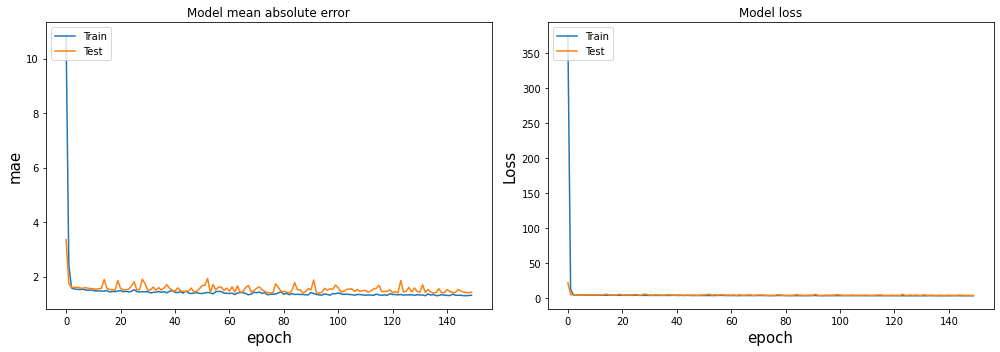

In [15]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model mean absolute error')
plt.ylabel('mae',size='15')
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('epoch',size='15')
# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss')
plt.ylabel('Loss',size='15')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('epoch',size='15')
plt.tight_layout()
plt.savefig('nn3layers.png',dpi=800)
plt.show()

# learning curve 

In [10]:
df=pd.read_csv('final v3.csv')
df.drop('IMDB ID',inplace=True,axis=1)
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=5,weights='distance')
df=pd.DataFrame(imp.fit_transform(df),index=df.index , columns=df.columns)

df=df.drop(['additive Producer(s) rank',
'additive Director(s) rank',
'additive Writer(s) rank',
'additive Stars rank',
'additive Distributor rank','IMDB score','IMDB votes',
'Mojo ID','Opening ($)','In Realease (Days)',
'Widest Release','Metascore','User',
'Critic','Year'],axis=1)


X=df.drop(['Domestic Gross ($)','Worldwide Gross ($)'],axis=1).to_numpy()
Y=df['Domestic Gross ($)'].to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y)


In [11]:
Y_log=np.log10(df['Domestic Gross ($)'])

In [12]:
X=df.drop(['Domestic Gross ($)','Worldwide Gross ($)'],axis=1).to_numpy()
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X,Y=shuffle(X,Y_log)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [14]:
def model_fn():
    model = ks.Sequential([
    #keras.layers.Flatten(input_shape=(32, 32)),    
    ks.layers.Dense(7,activation=tf.nn.relu, kernel_regularizer=ks.regularizers.l2(0.1) ),
    ks.layers.Dense(25,activation=tf.nn.relu, kernel_regularizer=ks.regularizers.l2(0.1)),
    ks.layers.Dense(1, activation='linear')
        ])
    model.compile(loss= 'mse', optimizer=ks.optimizers.Adam(learning_rate=0.01), metrics=['mse'])

    return model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import StratifiedKFold

csv_logger = CSVLogger('reg.log', append=True)
calls=[csv_logger, EarlyStopping(monitor='loss', patience=10)]

ks_model = KerasRegressor(build_fn=model_fn, epochs=250, batch_size=500, verbose=0  )
# evaluate using 10-fold cross validation
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0 )
results = cross_val_score(ks_model, X, Y, cv=10,fit_params = {'callbacks': calls})

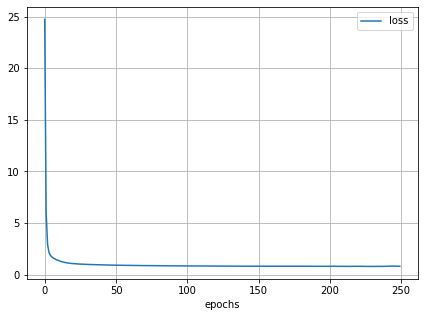

In [16]:
df2 = pd.read_csv('reg.log')
plt.figure(figsize=(7,5))
plt.plot(df2.groupby('epoch')['loss'].mean())
plt.legend(['loss'])
plt.xlabel('epochs')
plt.grid()
plt.savefig('reg.pdf',bbox_inches='tight')

In [17]:
%%time
model = model_fn()
history = model.fit(X_train,Y_train,epochs=500,batch_size=500,validation_split=0.2,verbose=1)

Epoch 1/500
9/9 [==============================] - 1s 30ms/step - loss: 32.1684 - mse: 30.1420 - val_loss: 24.5210 - val_mse: 23.4277
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 19.7346 - mse: 18.6839 - val_loss: 5.7832 - val_mse: 4.6392
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 4.3051 - mse: 3.0852 - val_loss: 4.9942 - val_mse: 3.7703
Epoch 4/500
9/9 [==============================] - 0s 10ms/step - loss: 3.9035 - mse: 2.7871 - val_loss: 2.5333 - val_mse: 1.7012
Epoch 5/500
9/9 [==============================] - 0s 6ms/step - loss: 2.4266 - mse: 1.6319 - val_loss: 2.0673 - val_mse: 1.3315
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 2.0195 - mse: 1.2909 - val_loss: 1.9198 - val_mse: 1.2371
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 1.8950 - mse: 1.2282 - val_loss: 1.8254 - val_mse: 1.1880
Epoch 8/500
9/9 [==============================] - 0s 6ms/step - loss: 1.7544 - mse: 1.11

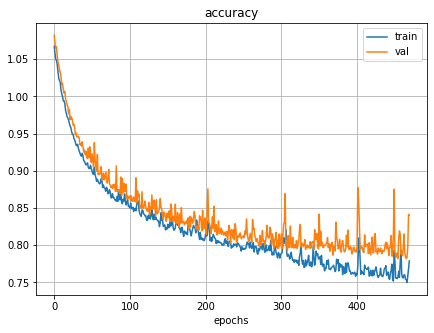

In [18]:
fig,ax=plt.subplots(1,1,figsize=(7,5))
ax.plot(history.history['loss'][30:])
ax.plot(history.history['val_loss'][30:])

ax.legend(['train','val'])

ax.set_title('accuracy')

ax.set_xlabel('epochs')
plt.grid()
#plt.savefig('val-acc-world-early-reg.pdf')
plt.show()

In [24]:
mean_squared_error(Y_test,model.predict(X_test))

0.7338441443373607

In [25]:
r2_score(Y_test,model.predict(X_test))

0.6262770564229585

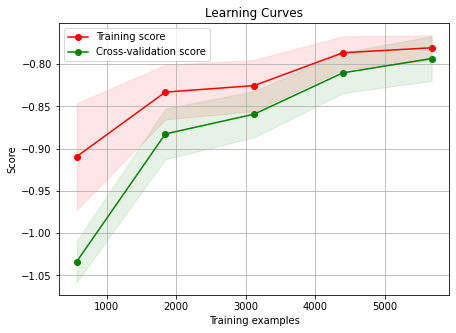

In [22]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(7, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=False)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #fit_times_mean = np.mean(fit_times, axis=1)
    #fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")


    return plt






title = "Learning Curves"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_learning_curve(ks_model, title, X,Y,cv=cv)
plt.savefig('learning-curves-reg.pdf',bbox_inches='tight')
plt.show()